In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Variables:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 
      1 = the patient survived 5 years or longer 
      2 = the patient died within 5 year

In [2]:
haberman_data = pd.read_csv('Haberman.csv')
haberman_data.columns = ['age','year','ax_nodes','class']

In [3]:
print(haberman_data.columns)
print(haberman_data.shape)

print('\n')
print(haberman_data['class'].value_counts())

Index(['age', 'year', 'ax_nodes', 'class'], dtype='object')
(305, 4)


1    224
2     81
Name: class, dtype: int64



1. There are total 305 observations
2. approximately 70% (224/305) of patients survived 5 years or longer after the operation.




# Uni Variate Analysis

In [4]:
## Generating PDFs
bin_edge = []
pdf = []
counts, bin_edge2 = np.histogram(haberman_data['age'],
                                density=True,bins=4) # Density='true' means give PDF but normalized to lie between 0 and 1
bin_edge.append(bin_edge2)
pdf.append(counts/np.sum(counts))

counts, bin_edge2 = np.histogram(haberman_data['year'],
                                density=True) # Density='true' means give PDF but normalized to lie between 0 and 1
bin_edge.append(bin_edge2)
pdf.append(counts/np.sum(counts))

counts, bin_edge2 = np.histogram(haberman_data['ax_nodes'],
                                density=True,bins=3) # Density='true' means give PDF but normalized to lie between 0 and 1
bin_edge.append(bin_edge2)
pdf.append(counts/np.sum(counts))

counts, bin_edge2 = np.histogram(haberman_data['class'],
                                density=True) # Density='true' means give PDF but normalized to lie between 0 and 1
bin_edge.append(bin_edge2)
pdf.append(counts/np.sum(counts))

== Distribution plots normalized Row 1 == X - Variable and Y - frequency
== Probaility Mass Function Row 2 == X - Variable and Y - probability


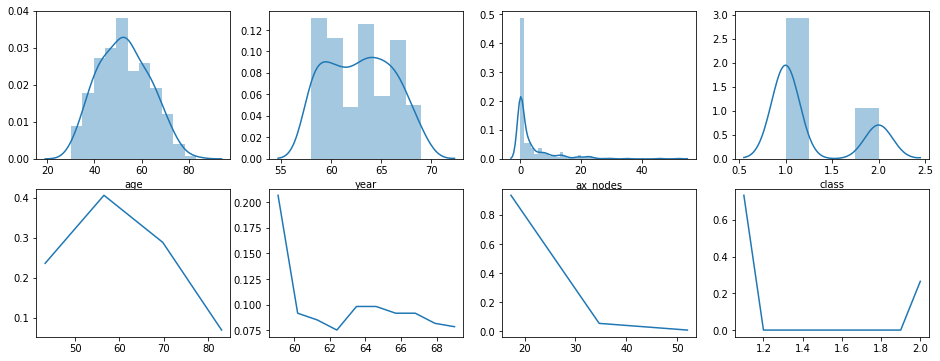

In [5]:
print("== Distribution plots normalized Row 1 == X - Variable and Y - frequency")
print("== Probaility Mass Function Row 2 == X - Variable and Y - probability")
fig=plt.figure(figsize=(16,6))
plt.subplot(241)
sns.distplot(haberman_data['age'])
plt.subplot(242)
sns.distplot(haberman_data['year'])
plt.subplot(243)
sns.distplot(haberman_data['ax_nodes'])
plt.subplot(244)
sns.distplot(haberman_data['class'])
plt.subplot(245)
plt.plot(bin_edge[0][1:],pdf[0])
plt.subplot(246)
plt.plot(bin_edge[1][1:],pdf[1])
plt.subplot(247)
plt.plot(bin_edge[2][1:],pdf[2])
plt.subplot(248)
plt.plot(bin_edge[3][1:],pdf[3])
plt.show()



1. ax_nodes data is skewed and histogram shows that most of the obeservations are having less axillary nodes.

2. PMF shows that Most of the opeartions are performed before 1964.

3. Probability of survival is high (~0.7).




In [6]:
print(haberman_data.describe())
haberman_survived = haberman_data[haberman_data['class']==1]
haberman_nsurvived = haberman_data[haberman_data['class']==2]

print('\n 25 50 75 100 percentiles of axillary nodes ==>', np.percentile(haberman_data['ax_nodes'],np.arange(25,101,25)))
print('\n 25 50 75 100 percentiles of axillary nodes for survived ==>', np.percentile(haberman_survived['ax_nodes'],np.arange(25,101,25)))
print('\n 25 50 75 100 percentiles of axillary nodes for not survived ==>', np.percentile(haberman_nsurvived['ax_nodes'],np.arange(25,101,25)))


              age        year    ax_nodes       class
count  305.000000  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066    1.265574
std     10.744024    3.254078    7.199370    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000

 25 50 75 100 percentiles of axillary nodes ==> [  0.   1.   4.  52.]

 25 50 75 100 percentiles of axillary nodes for survived ==> [  0.   0.   3.  46.]

 25 50 75 100 percentiles of axillary nodes for not survived ==> [  1.   4.  11.  52.]



1. 25% of the patients dont have axillary nodes.

2. 75% of the patients has <= 4 axillary nodes.

3. 75% of the survived patients are having < 4 axilary nodes.


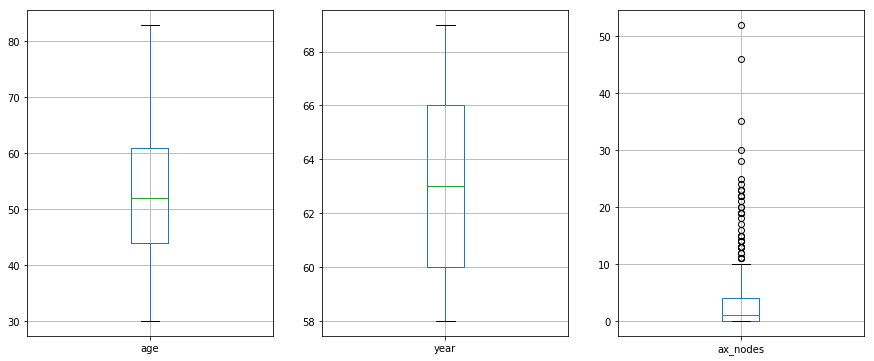

In [7]:
fig = plt.figure(figsize=(15,6))
plt.subplot(131)
haberman_data.boxplot('age')
plt.subplot(132)
haberman_data.boxplot('year')
plt.subplot(133)
haberman_data.boxplot('ax_nodes')
plt.show()


1. ax_nodes as multiple outliers.


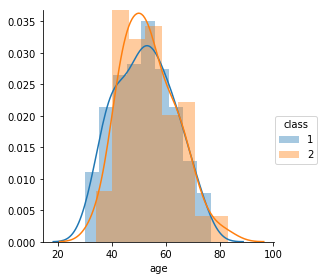

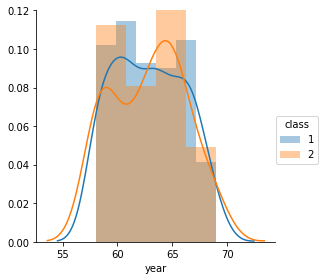

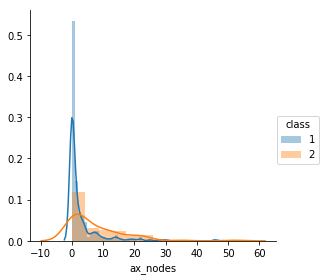

In [8]:
sns.FacetGrid(haberman_data,hue='class',size=4).map(sns.distplot,'age').add_legend()
sns.FacetGrid(haberman_data,hue='class',size=4).map(sns.distplot,'year').add_legend()
sns.FacetGrid(haberman_data,hue='class',size=4).map(sns.distplot,'ax_nodes').add_legend()
plt.show()


1. Age and Year features for both class are overlapping so not useful.

2. ax_nodes feature can be considered as an important feature.
       Though survival and non survival distributions are overlapping, survival distribution has most of points approximately <4 (intersection of two curves from right) and possibility of error is less because the height of class=2 distribution is small for ax_nodes~<4 compared to height of class=1 distribution.
       
       

# Bi Variate Analaysis

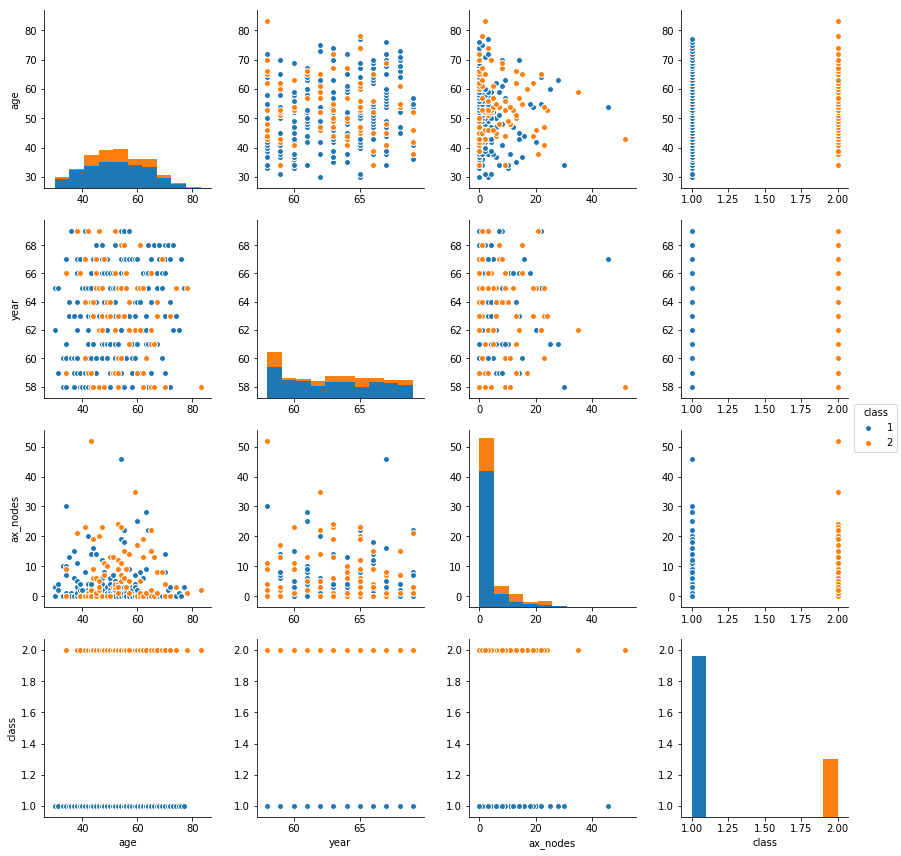

In [9]:
sns.pairplot(haberman_data,hue='class',size=3)
plt.show()


From above pair scatter plot couldnt infer anything as all are overlapping


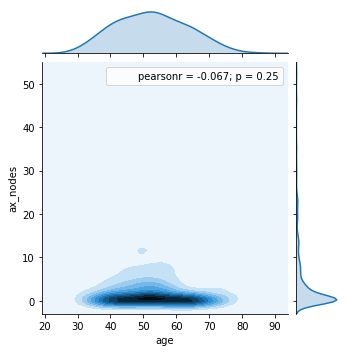

In [10]:
sns.jointplot(x='age',y='ax_nodes',data=haberman_data,size=5,kind='kde')
plt.show()